In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import scipy
from scipy.optimize import curve_fit
from matplotlib import style

10


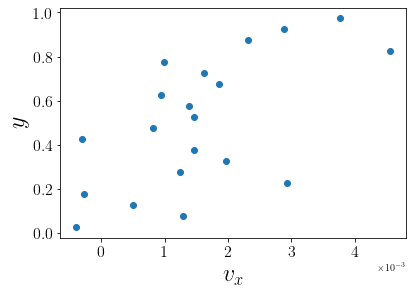

In [5]:
frame_no = []
line_counter = 0
iter = 0
with open("velprof.dat","r") as file1:
    for line in file1.readlines()[3:]:
        line_counter = line_counter + 1 
        if (line_counter <= 21):
            f_list = [float(i) for i in line.split()]
            if line_counter == 1:
                frame_no.append(f_list[0])
        if (line_counter == 21):
            line_counter = 0
            iter += 1
print(len(frame_no))           
line_counter = 0
coord = np.zeros(20)
velocity = np.zeros_like(np.arange(len(frame_no)*20).reshape(len(frame_no),20),dtype = float)
iter = 0
frame_no = []
j = 0
with open("velprof.dat","r") as file1:
    for line in file1.readlines()[3:]:
        line_counter = line_counter + 1 
        if (line_counter <= 21):
            f_list = [float(i) for i in line.split()]
            
            if line_counter == 1:
                frame_no.append(f_list[0])  
            else:
                coord[j] = f_list[1]
                velocity[iter,j] = f_list[-1]
                j += 1
                
        if (line_counter == 21):
            line_counter = 0
            iter += 1
            j = 0
#t_av = []
#av_vel = []
#sd_vel = []            
#for i in range(0,len(velocity)):
#    for j in range(0,len(velocity)):
#        t_av.append(velocity[j,i])
#    av_vel.append(np.mean(t_av))
#    sd_vel.append(np.std(t_av))        
#plt.errorbar(av_vel,coord,xerr = sd_vel,fmt = 'o',color = 'green')
fig = plt.figure()
ax = fig.add_axes([0.15,0.15,0.8,0.8])
ax.plot(velocity[-1,:],coord,'o',label = 'steady-state')
plt.ylabel('$y$',fontsize = 24)
plt.xlabel('$v_x$',fontsize = 24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('vel_prof.jpg',dpi = 600)
       

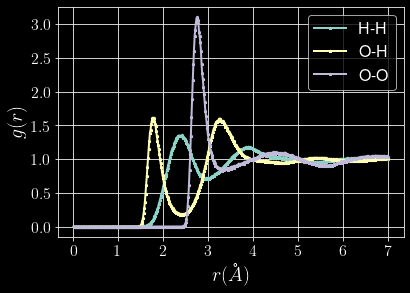

In [8]:
ghh = np.genfromtxt('rdf_Hyd.dat',skip_header=4)
goh = np.genfromtxt('rdf_OH.dat',skip_header=4)
goo = np.genfromtxt('rdf_Oxy.dat',skip_header=4)
fig = plt.figure()
plt.style.use('dark_background')
ax = fig.add_axes([0.15,0.16,0.80,0.80])
ax.plot(ghh[:,1],ghh[:,2],'-*',markersize = 3,linewidth = 2,label = "H-H")
ax.plot(goh[:,1],goh[:,2],'-*',markersize = 3,linewidth = 2,label = "O-H")
ax.plot(goo[:,1],goo[:,2],'-*',markersize = 3,linewidth = 2,label = "O-O")
plt.xlabel(r"$r (\AA)$",fontsize = 20)
plt.ylabel("$g(r)$",fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
plt.grid()
plt.savefig('combined_gr.jpg',dpi = 600)

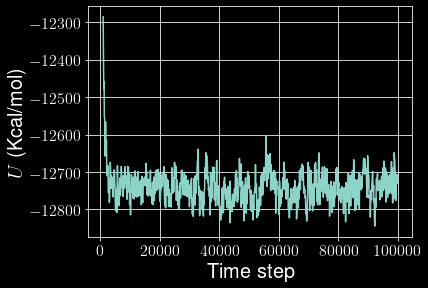

In [10]:
pot = np.genfromtxt('eq_thermo.dat',skip_header=1)
fig = plt.figure()
ax = fig.add_axes([0.20,0.16,0.75,0.80])
ax.plot(pot[10:,0],pot[10:,3])
plt.xlabel("Time step",fontsize = 20)
plt.ylabel("$U$ (Kcal/mol)",fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.savefig('pot_energy.jpg',dpi = 600)

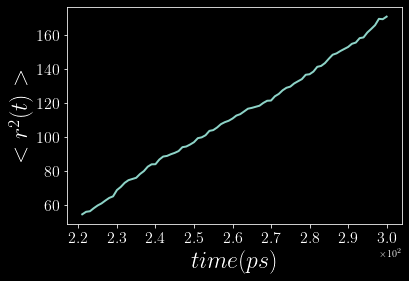

In [11]:
frame_no = []
msd = []
dt = 2*1e-3
line_counter = 0
iter = 0
with open("msd.dat","r") as file1:
    for line in file1.readlines()[3:]:
        line_counter = line_counter + 1 
        if (line_counter <= 5):
            f_list = [float(i) for i in line.split()]           
            if line_counter == 1:
                frame_no.append(f_list[0])  
            elif line_counter == 5:
                msd.append(f_list[1])
                line_counter = 0
                iter += 1          
frame_no = np.array(frame_no)*dt
msd = np.array(msd)
plt.plot(frame_no[20:],msd[20:],'-',linewidth = 2)
plt.xlabel('$time (ps)$',fontsize = 24)
plt.ylabel(r'$<r^2(t)>$',fontsize = 24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#plt.savefig('msd.jpg',dpi = 600)
       

In [12]:
def objective_fun(x,a,b):
    return (a*x) + b

In [13]:
X = frame_no[:]
Y1 = msd[:]
pars1, cov1 = curve_fit(f=objective_fun, xdata=X, ydata=Y1)
print(pars1)
y1 = frame_no[:]*pars1[0] + pars1[1]

[   1.51898505 -284.93064897]


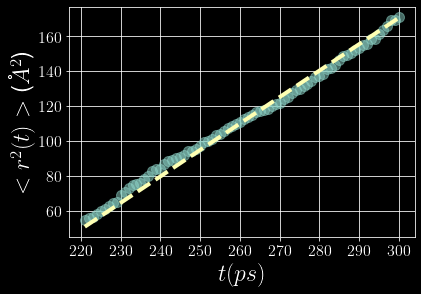

In [18]:
fig = plt.figure()
ax=fig.add_axes([0.15,0.17,0.80,0.80])
plt.style.use('dark_background')
plt.plot(frame_no[20:],msd[20:],'o',markersize = 10,alpha = 0.5)
plt.plot(frame_no[20:],y1[20:],'--',linewidth = 4)
plt.xlabel('$t (ps)$',fontsize = 24)
plt.ylabel(r'$<r^2(t)>$ ($\AA^2$)',fontsize = 24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid()
plt.savefig('msd.jpg',dpi = 600)

In [20]:
factor = ((1e-10)**2)/(1*1e-12)
diffusivity = pars1[0]*factor
print(diffusivity)

1.5189850517756364e-08
